In [112]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import plotnine as gg
import umap
from bokeh.io import output_notebook
from bokeh.io import show as bshow
from bokeh.plotting import figure
from bokeh.models import Diamond
import bokeh
from PIL import Image
import matplotlib.pyplot as plt
import re

In [6]:

def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)
    
    ch1 = [s for s in image_data if "ch1" in s]
    ch2 = [s for s in image_data if "ch2" in s]
    ch3 = [s for s in image_data if "ch3" in s]
    ch4 = [s for s in image_data if "ch4" in s]
    ch5 = [s for s in image_data if "ch5" in s]
    ch6 = [s for s in image_data if "ch6" in s]



    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in ch1]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path, ch1, ch2, ch3, ch4, ch5, ch6, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', 'ch1', 'ch2', 'ch3','ch4','ch5','ch6',
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath).head(5)


df

path                             ch1  \
0  /Users/habbasi/Desktop/images  r01c12f01p01-ch1sk1fk1fl1.tiff   
1  /Users/habbasi/Desktop/images  r16c20f06p01-ch1sk1fk1fl1.tiff   
2  /Users/habbasi/Desktop/images  r16c20f07p01-ch1sk1fk1fl1.tiff   
3  /Users/habbasi/Desktop/images  r16c20f08p01-ch1sk1fk1fl1.tiff   
4  /Users/habbasi/Desktop/images  r16c20f09p01-ch1sk1fk1fl1.tiff   

                              ch2                             ch3  \
0  r01c12f01p01-ch2sk1fk1fl1.tiff  r01c12f01p01-ch3sk1fk1fl1.tiff   
1  r16c20f06p01-ch2sk1fk1fl1.tiff  r16c20f06p01-ch3sk1fk1fl1.tiff   
2  r16c20f07p01-ch2sk1fk1fl1.tiff  r16c20f07p01-ch3sk1fk1fl1.tiff   
3  r16c20f08p01-ch2sk1fk1fl1.tiff  r16c20f08p01-ch3sk1fk1fl1.tiff   
4  r16c20f09p01-ch2sk1fk1fl1.tiff  r16c20f09p01-ch3sk1fk1fl1.tiff   

                              ch4                             ch5  \
0  r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch5sk1fk1fl1.tiff   
1  r16c20f06p01-ch4sk1fk1fl1.tiff  r16c20f06p01-ch5sk1fk1fl1.tiff   
2  r16c20f07p01-ch4sk1fk1fl1.tiff  r16c20f07p01-ch5sk1fk1fl1.tiff   
3  r16c20f08p01-ch4sk1fk1fl1.tiff  r16c20f08p01-ch5sk1fk1fl1.tiff   
4  r16c20f09p01-ch4sk1fk1fl1.tiff  r16c20f09p01-ch5sk1fk1fl1.tiff   

                              ch6 Metadata_Well Metadata_Row Metadata_Col  \
0  r01c12f01p01-ch6sk1fk1fl1.tiff           A12           01           12   
1  r16c20f06p01-ch6sk1fk1fl1.tiff           P20           16           20   
2  r16c20f07p01-ch6sk1fk1fl1.tiff           P20           16           20   
3  r16c20f08p01-ch6sk1fk1fl1.tiff           P20           16           20   
4  r16c20f09p01-ch6sk1fk1fl1.tiff           P20           16           20   

  Metadata_Field Metadata_Site Metadata_channel  
0             01            01                1  
1             06            01                1  
2             07            01                1  
3             08            01                1  
4             09            01                1

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import re
import skimage.io


def load_images(fpath):
    image_data = []
    img_path = []
    
    for img in sorted(os.listdir(fpath)):
        
    
        imgpath = os.path.join(fpath, img)
        img = Image.open(imgpath)
        head, tail = os.path.split(imgpath)
        img_name = os.path.splitext(tail)[0]
    
        image_data.append(tail)
        img_path.append(head)


    
 ## extracting metadata from image file name and defining into groups

    pattern = re.compile("r(?P<row>\d+)c(?P<column>\d+)f(?P<field>\d+)p(?P<site>\d+)-ch(?P<channelnumber>\d+)")


 ## apply this regrex to all the imagelist

    match = [pattern.match(i) for i in image_data]
    row = [r.group("row") for r in match]
    col= [c.group("column") for c in match]
    field= [f.group("field") for f in match]
    site= [s.group("site") for s in match]
    channel= [ch.group("channelnumber") for ch in match]

# ## Defining Well names

    rc = [r+c for r, c in zip(row, col)]

    well_assignment= {'01' : "A",'02': "B",'03':"C",'04':"D",
                  '05': "E",'06':"F",'07':"G",'08':"H",
                  '09':"I",'10':"J",'11':"K",'12':"L",
                  '13':"M",'14':"N",'15':"O",'16':"P"
    }

    well = [well_assignment.get(i[0:2])+i[2:] for i in rc]

    zippedlist = list(zip(img_path,image_data, well, row, col, field, site, channel))



    df = pd.DataFrame(zippedlist, columns=['path', "filename", 
                                       'Metadata_Well', 
                                        'Metadata_Row', 
                                        'Metadata_Col',
                                       'Metadata_Field',
                                       'Metadata_Site',
                                       'Metadata_channel'
                                      ])
    
    
    return df


fpath = "/Users/habbasi/Desktop/images"

df = load_images(fpath)


df.Metadata_channel.unique()

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [12]:
df.head()

path                        filename  \
0  /Users/habbasi/Desktop/images  r01c12f01p01-ch1sk1fk1fl1.tiff   
1  /Users/habbasi/Desktop/images  r01c12f01p01-ch2sk1fk1fl1.tiff   
2  /Users/habbasi/Desktop/images  r01c12f01p01-ch3sk1fk1fl1.tiff   
3  /Users/habbasi/Desktop/images  r01c12f01p01-ch4sk1fk1fl1.tiff   
4  /Users/habbasi/Desktop/images  r01c12f01p01-ch5sk1fk1fl1.tiff   

  Metadata_Well Metadata_Row Metadata_Col Metadata_Field Metadata_Site  \
0           A12           01           12             01            01   
1           A12           01           12             01            01   
2           A12           01           12             01            01   
3           A12           01           12             01            01   
4           A12           01           12             01            01   

  Metadata_channel  
0                1  
1                2  
2                3  
3                4  
4                5

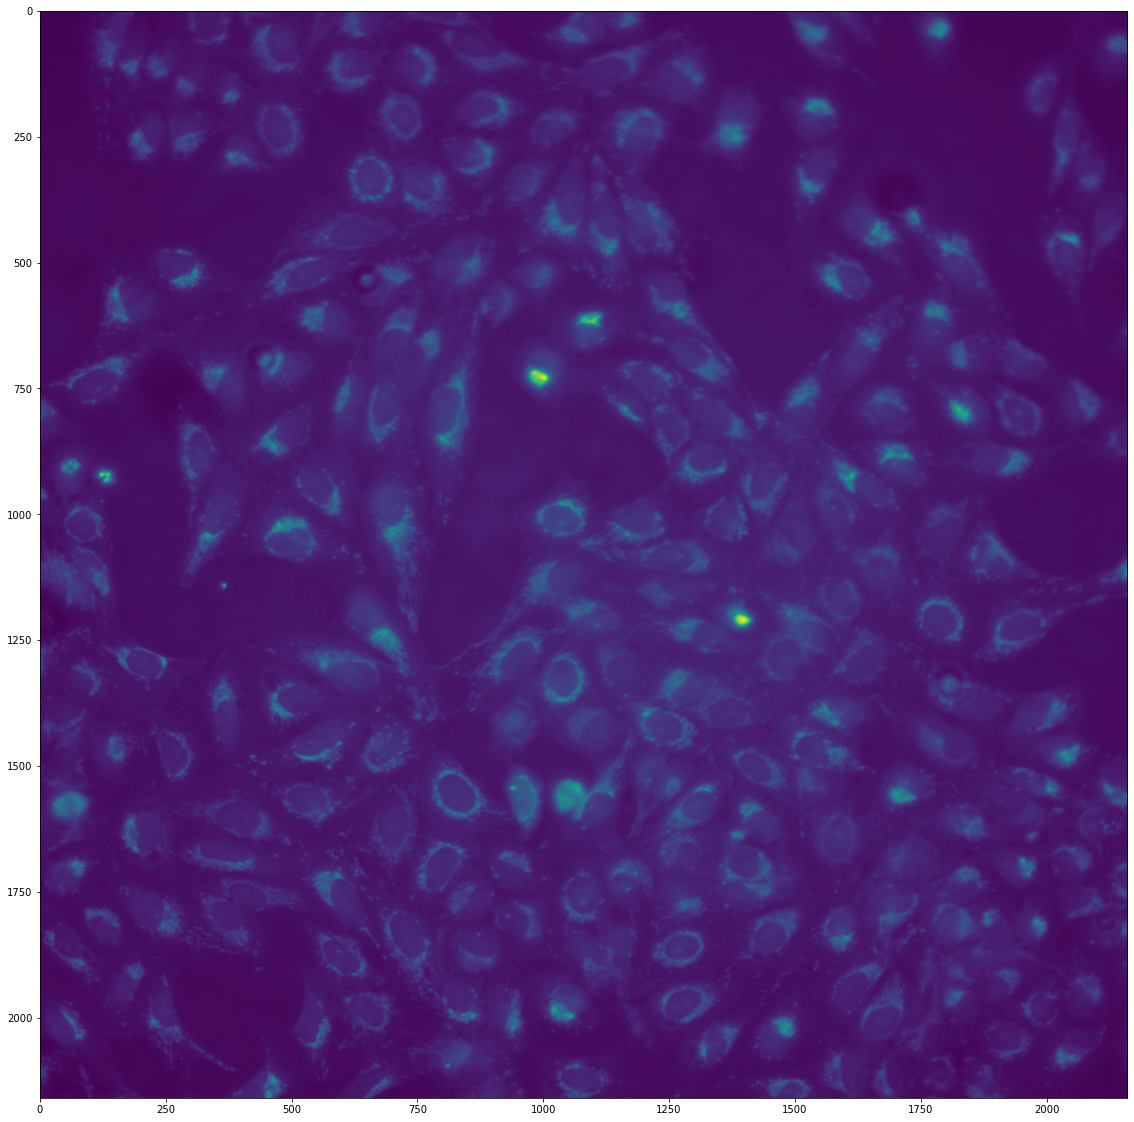

In [110]:
import matplotlib.image as mpimg
import glob
import PIL

well = 'P20'
field = 6
channel = 1

if isinstance(field, int):
    field = (str(field)
             .zfill(2)
            )
    
if isinstance(channel, int):
    channel = str(channel)
            

input_dir = "/Users/habbasi/Desktop/images"

img = sorted(df.query("Metadata_Well in @ well and Metadata_Field in @ field")["filename"].tolist())
img = img[0]

image_data = skimage.io.imread(os.path.join(input_dir, img))



# # ## Reading images    
#image_data = [skimage.io.imread(os.path.join(input_dir, each)) for each in img]


# for i, x in enumerate(img):
#     image = skimage.io.imread(os.path.join(input_dir, x))
#     plt.subplot(2,3,i+1)
#     plt.title(x.split('-')[1][0:3])
#     plt.axis('off')
#     plt.imshow(image)
    
    


    
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import ImageGrid

# fig = plt.figure(figsize=(20., 20.))
# grid = ImageGrid(fig, 111,  # similar to subplot(111)
#                  nrows_ncols=(1, 6),  # creates 2x2 grid of axes
#                  axes_pad=0.3,  # pad between axes in inch.
#                  )

# for ax, im, image in zip(grid, image_data, img):
#     print(image)
# #     image = skimage.io.imread(os.path.join(input_dir, im)
# #     # Iterating over the grid returns the Axes.
#     ax.imshow(im)



plt.figure(figsize=(20,20))

plt.imshow(image_data)












In [ ]:
# input_dir = "/Users/habbasi/Desktop/images"


# ## Reading images    
# image_data = [skimage.io.imread(os.path.join(input_dir, each)) for each in img]

# import matplotlib.pyplot as plt
# def show_images(image_data):
#     n: int = len(image_data)
#     f = plt.figure(figsize=(5,5))
#     for i in range(n):
#         # Debug, plot figure
#         f.add_subplot(5, n, i + 1)
#         plt.imshow(image_data[i])

#     plt.show(block=True)

    
# show_images(image_data)


# # def display_multiple_img(images, rows = 1, cols=1):
# #     figure, ax = plt.subplots(nrows=rows,ncols=cols )
# #     for ind,title in enumerate(images):
# #         ax.ravel()[ind].imshow(images[title])
# #         ax.ravel()[ind].set_title(title)
# #         ax.ravel()[ind].set_axis_off()
# #     plt.tight_layout()
# #     plt.show()

# # total_images = 6

# # display_multiple_img(image_data, 3, 2)


    
# # import matplotlib.pyplot as plt
# # from mpl_toolkits.axes_grid1 import ImageGrid

# # fig = plt.figure(figsize=(20., 20.))
# # grid = ImageGrid(fig, 111,  # similar to subplot(111)
# #                  nrows_ncols=(1, 6),  # creates 2x2 grid of axes
# #                  axes_pad=0.3,  # pad between axes in inch.
# #                  )

# # for ax, im in zip(grid, image_data):
# #     # Iterating over the grid returns the Axes.
# #     ax.imshow(im)

# # plt.show()













In [9]:
path = os.getcwd()

foldername = "BR00100032"
data_file = foldername + "_selected_wells.csv"
df = pd.read_csv(Path("../" + foldername + "/" + data_file))


TableNumber  ImageNumber  ObjectNumber  \
0  42492787882573904418759932671851417937          100             1   
1  42492787882573904418759932671851417937          100             2   
2  42492787882573904418759932671851417937          100             3   
3  42492787882573904418759932671851417937          100             4   
4  42492787882573904418759932671851417937          100             5   

   Cells_AreaShape_Area  Cells_AreaShape_Center_X  Cells_AreaShape_Center_Y  \
0                  6690                     867.0                      42.0   
1                  4665                     704.0                      30.0   
2                  5242                    1694.0                      23.0   
3                  2061                    1774.0                      35.0   
4                  2275                    1668.0                      61.0   

   Cells_AreaShape_Compactness  Cells_AreaShape_Eccentricity  \
0                     1.140277                      0.691766   
1                     1.085347                      0.629252   
2                     1.374228                      0.781731   
3                     1.174983                      0.798655   
4                     1.111575                      0.697623   

   Cells_AreaShape_EulerNumber  Cells_AreaShape_Extent  ...  Width_IllumDNA  \
0                            1                0.604336  ...            2160   
1                            1                0.711128  ...            2160   
2                            1                0.509823  ...            2160   
3                            1                0.563577  ...            2160   
4                            1                0.594305  ...            2160   

   Width_IllumER  Width_IllumMito  Width_IllumRNA  Width_OrigAGP  \
0           2160             2160            2160           2160   
1           2160             2160            2160           2160   
2           2160             2160            2160           2160   
3           2160             2160            2160           2160   
4           2160             2160            2160           2160   

   Width_OrigBrightfield  Width_OrigDNA  Width_OrigER  Width_OrigMito  \
0                   2160           2160          2160            2160   
1                   2160           2160          2160            2160   
2                   2160           2160          2160            2160   
3                   2160           2160          2160            2160   
4                   2160           2160          2160            2160   

   Width_OrigRNA  
0           2160  
1           2160  
2           2160  
3           2160  
4           2160  

[5 rows x 2979 columns]

In [336]:
dm = df.query("Metadata_Well == 'A12'")

dn = dm.replace(regex={r'^/home/ubuntu/bucket/projects/2018_11_20_GeneCpdFollowup/2018_11_20_Batch1/images/BR00100032__2018-11-20T09_38_24-Measurement2/Images': "/Users/habbasi/Desktop/images", 
                      "/home/ubuntu/local_output/*": "/Users/habbasi/Desktop/"})


dn = dn.loc[:, 
       ["Nuclei_Location_Center_X", "Nuclei_Location_Center_Y",
        "PathName_OrigDNA", "Metadata_Well", "Metadata_Site", 
        "FileName_OrigDNA", "PathName_NucleiOutlines", "FileName_OrigRNA","FileName_OrigMito","FileName_OrigER", "FileName_OrigAGP",
        "FileName_NucleiOutlines", "Cells_Location_Center_X", 
        "Cells_Location_Center_Y", "Cells_AreaShape_MajorAxisLength", "Cells_AreaShape_MinorAxisLength"]]

def rounding_up(x):
    x['Cells_Location_Center_X'] = round(x['Cells_Location_Center_X'], 4)
    x['Cells_Location_Center_Y'] = round(x['Cells_Location_Center_Y'], 4)
    
    return x

dp = dn.copy()



dp = rounding_up(dp)


In [345]:
dp.head(10000)

Nuclei_Location_Center_X  Nuclei_Location_Center_Y  \
0                   863.913991                 27.078082   
1                   713.406982                 28.742819   
2                  1683.222917                 24.622222   
3                  1795.810179                 42.269601   
4                  1672.429848                 61.785076   
...                        ...                       ...   
4936                167.597090               2109.910582   
4937               2028.756919               2119.506919   
4938               1923.709360               2120.492200   
4939                587.175297               2128.800537   
4940               1478.971789               2131.268835   

                   PathName_OrigDNA Metadata_Well  Metadata_Site  \
0     /Users/habbasi/Desktop/images           A12              1   
1     /Users/habbasi/Desktop/images           A12              1   
2     /Users/habbasi/Desktop/images           A12              1   
3     /Users/habbasi/Desktop/images           A12              1   
4     /Users/habbasi/Desktop/images           A12              1   
...                             ...           ...            ...   
4936  /Users/habbasi/Desktop/images           A12              9   
4937  /Users/habbasi/Desktop/images           A12              9   
4938  /Users/habbasi/Desktop/images           A12              9   
4939  /Users/habbasi/Desktop/images           A12              9   
4940  /Users/habbasi/Desktop/images           A12              9   

                    FileName_OrigDNA  \
0     r01c12f01p01-ch5sk1fk1fl1.tiff   
1     r01c12f01p01-ch5sk1fk1fl1.tiff   
2     r01c12f01p01-ch5sk1fk1fl1.tiff   
3     r01c12f01p01-ch5sk1fk1fl1.tiff   
4     r01c12f01p01-ch5sk1fk1fl1.tiff   
...                              ...   
4936  r01c12f09p01-ch5sk1fk1fl1.tiff   
4937  r01c12f09p01-ch5sk1fk1fl1.tiff   
4938  r01c12f09p01-ch5sk1fk1fl1.tiff   
4939  r01c12f09p01-ch5sk1fk1fl1.tiff   
4940  r01c12f09p01-ch5sk1fk1fl1.tiff   

                               PathName_NucleiOutlines  \
0     /Users/habbasi/Desktop/BR00100032-A12-1/outlines   
1     /Users/habbasi/Desktop/BR00100032-A12-1/outlines   
2     /Users/habbasi/Desktop/BR00100032-A12-1/outlines   
3     /Users/habbasi/Desktop/BR00100032-A12-1/outlines   
4     /Users/habbasi/Desktop/BR00100032-A12-1/outlines   
...                                                ...   
4936  /Users/habbasi/Desktop/BR00100032-A12-9/outlines   
4937  /Users/habbasi/Desktop/BR00100032-A12-9/outlines   
4938  /Users/habbasi/Desktop/BR00100032-A12-9/outlines   
4939  /Users/habbasi/Desktop/BR00100032-A12-9/outlines   
4940  /Users/habbasi/Desktop/BR00100032-A12-9/outlines   

                    FileName_OrigRNA               FileName_OrigMito  \
0     r01c12f01p01-ch3sk1fk1fl1.tiff  r01c12f01p01-ch1sk1fk1fl1.tiff   
1     r01c12f01p01-ch3sk1fk1fl1.tiff  r01c12f01p01-ch1sk1fk1fl1.tiff   
2     r01c12f01p01-ch3sk1fk1fl1.tiff  r01c12f01p01-ch1sk1fk1fl1.tiff   
3     r01c12f01p01-ch3sk1fk1fl1.tiff  r01c12f01p01-ch1sk1fk1fl1.tiff   
4     r01c12f01p01-ch3sk1fk1fl1.tiff  r01c12f01p01-ch1sk1fk1fl1.tiff   
...                              ...                             ...   
4936  r01c12f09p01-ch3sk1fk1fl1.tiff  r01c12f09p01-ch1sk1fk1fl1.tiff   
4937  r01c12f09p01-ch3sk1fk1fl1.tiff  r01c12f09p01-ch1sk1fk1fl1.tiff   
4938  r01c12f09p01-ch3sk1fk1fl1.tiff  r01c12f09p01-ch1sk1fk1fl1.tiff   
4939  r01c12f09p01-ch3sk1fk1fl1.tiff  r01c12f09p01-ch1sk1fk1fl1.tiff   
4940  r01c12f09p01-ch3sk1fk1fl1.tiff  r01c12f09p01-ch1sk1fk1fl1.tiff   

                     FileName_OrigER                FileName_OrigAGP  \
0     r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch2sk1fk1fl1.tiff   
1     r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch2sk1fk1fl1.tiff   
2     r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch2sk1fk1fl1.tiff   
3     r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch2sk1fk1fl1.tiff   
4     r01c12f01p01-ch4sk1fk1fl1.tiff  r01c12f01p01-ch2sk1fk1fl1.t

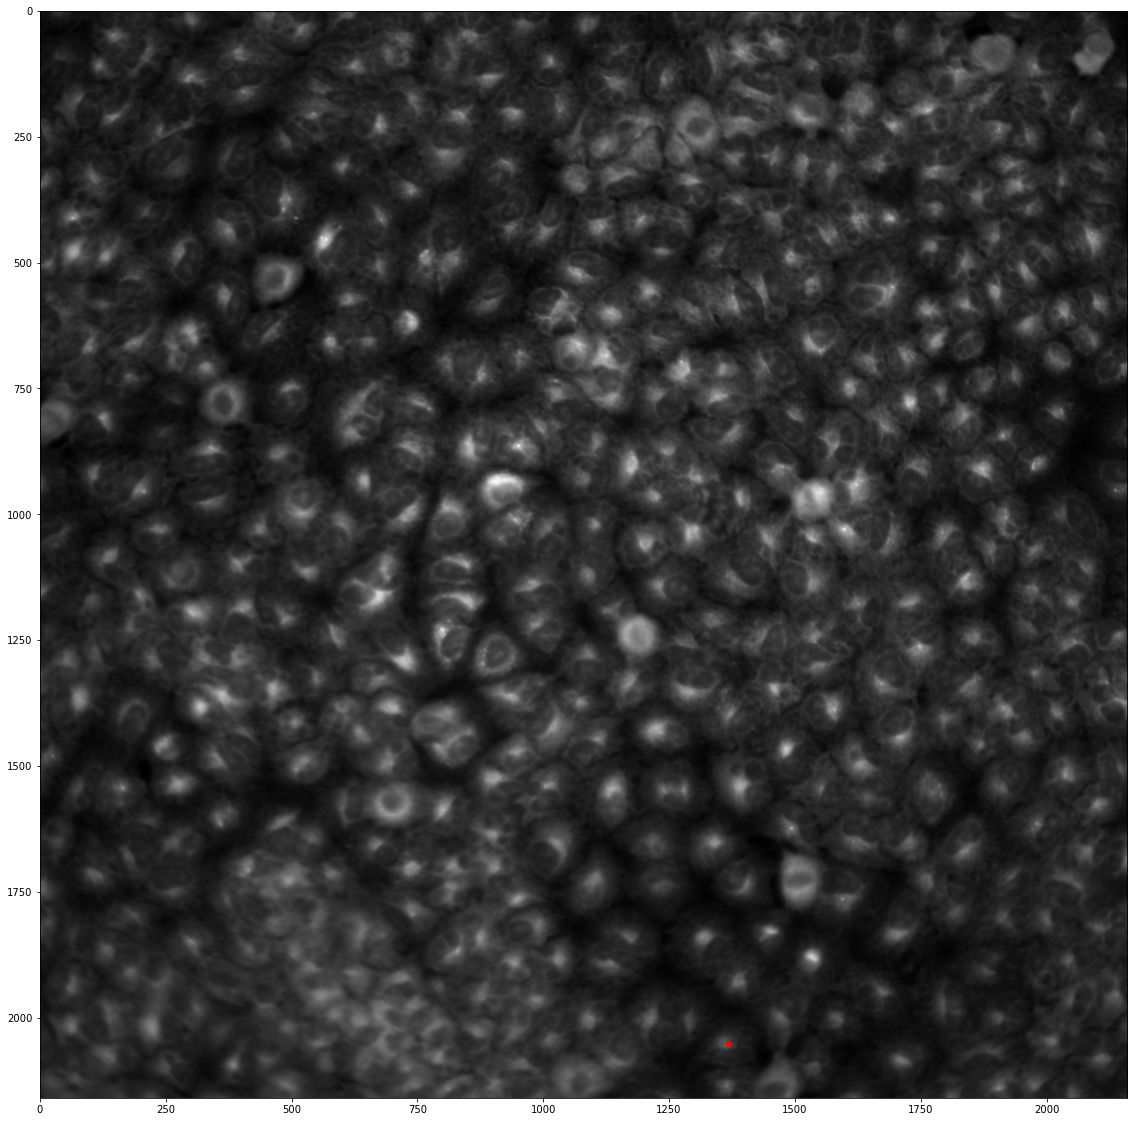

In [349]:


well = 'A12'
site = 1
cell_x = 1366.5704
cell_y = 2051.6060



tmp = dp[(dp['Cells_Location_Center_X'] == cell_x) 
        & (dp['Cells_Location_Center_Y'] == cell_y) 
        & (dp['Metadata_Well'] == well)
       & (dp['Metadata_Site'] == site)].reset_index()




major_axis = tmp.Cells_AreaShape_MajorAxisLength.values[0]
minor_axis = tmp.Cells_AreaShape_MinorAxisLength.values[0]


imagelist = tmp.loc[:, ['FileName_OrigDNA', 
                        "FileName_OrigRNA", 
                        "FileName_OrigMito", 
                        "FileName_OrigAGP",
                        "FileName_OrigER"]].values.tolist()[0]


input_dir = tmp['PathName_OrigDNA'][0]




imaglist = [skimage.io.imread(os.path.join(input_dir, img)) for img in imagelist]

plt.figure(figsize=(20,20))

plt.imshow(imaglist[4],  cmap='gray')

pts = np.array([cell_x, cell_y])

plt.plot(cell_x, cell_y, "or", markersize=5)  # og:shorthand for green circle
#plt.scatter(pts[0], pts[1], marker="*", color="red", s=200)
plt.show()


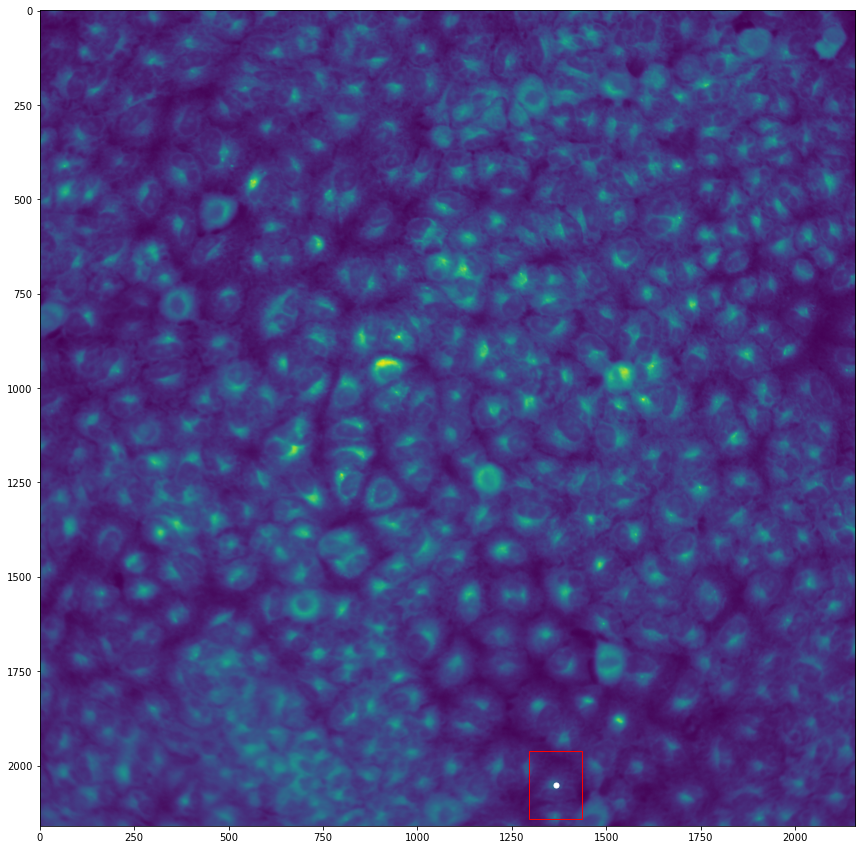

In [363]:
cell_x = 1366.5704
cell_y = 2051.6060
major_axis = tmp.Cells_AreaShape_MajorAxisLength.values[0]
minor_axis = tmp.Cells_AreaShape_MinorAxisLength.values[0]


def bounding_box(x, y, minor_axis, major_axis):
    
    minor_radius = round(minor_axis/2, 3) * 1.5
    major_radius = round(major_axis/2, 3) * 1.5
    
    xmin = x - minor_radius
    xmax = x + minor_radius
    ymin = y - major_radius
    ymax = y + major_radius


    width, height = xmax - xmin, ymax - ymin
    
    return xmin, ymin, xmax, ymax, width, height


bbox = bounding_box(cell_x, cell_y, minor_axis, major_axis)




# # Create figure and axes
fig,ax = plt.subplots(figsize=(15,15))

# Display the image
ax.imshow(imaglist[4])

# # Create a Rectangle patch
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[4], bbox[5], linewidth=1,edgecolor='r',facecolor='none')

# # Add the patch to the Axes
ax.add_patch(rect)
plt.plot(cell_x, cell_y, "ow", markersize=5)  
plt.show()

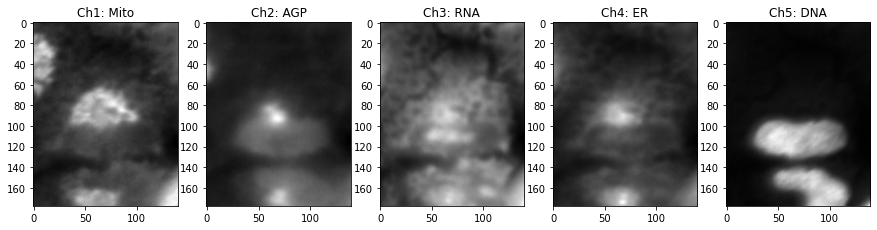

In [551]:
def bounding_box(x, y, minor_axis, major_axis):
    
    
    minor_radius = round(minor_axis/2, 3) * 1.5
    major_radius = round(major_axis/2, 3) * 1.5
    
    xmin = x - minor_radius
    xmax = x + minor_radius
    ymin = y - major_radius
    ymax = y + major_radius


    width, height = xmax - xmin, ymax - ymin
    
    return int(ymin), int(ymax), int(xmin), int(xmax)

bbox = bounding_box(cell_x, cell_y, minor_axis, major_axis)


imlist = sorted([os.path.join(input_dir, img) for img in imagelist])
readimg = [skimage.io.imread(img) for img in imlist]

labels = {"Ch1": "Mito",
          "Ch2": "AGP",
          "Ch3": "RNA",
          "Ch4": "ER", 
          "Ch5": "DNA"}
    


def plotting_cropped_image(imagelist, labels, boundingbox):
    

    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(151)
    ax1.imshow(imagelist[0][bbox[0]: bbox[1], bbox[2]: bbox[3]], cmap='gray')
    ax1.set_title(labels.get("Ch1"))
    ax1.axis("off")

    ax2 = fig.add_subplot(152)
    ax2.imshow(imagelist[1][bbox[0]: bbox[1], bbox[2]: bbox[3]], cmap='gray')
    ax2.set_title(labels.get("Ch2"))
    ax2.axis("off")

    ax3 = fig.add_subplot(153)
    ax3.imshow(imagelist[2][bbox[0]: bbox[1], bbox[2]: bbox[3]], cmap='gray')
    ax3.set_title(labels.get("Ch3"))
    ax3.axis("off")

    ax4 = fig.add_subplot(154)
    ax4.imshow(imagelist[3][bbox[0]: bbox[1], bbox[2]: bbox[3]], cmap='gray')
    ax4.set_title(labels.get("Ch4"))
    ax4.axis("off")

    ax5 = fig.add_subplot(155)
    ax5.imshow(imagelist[4][bbox[0]: bbox[1], bbox[2]: bbox[3]], cmap='gray')
    ax5.set_title(labels.get("Ch5"))
    ax5.axis("off")
    
    return ax1, ax2, ax3, ax4, ax5


#plotting_cropped_image(readimg, labels, bbox)

labels = ['Ch1: Mito', 'Ch2: AGP', 'Ch3: RNA', 'Ch4: ER', 'Ch5: DNA']

def plotting_cropped_image_2(imagelist, labels, boundingbox):
    
    '''imagelist: should be list of image path, 
      labels: list of channels,
     boundingbox: Calculated in a function required to crop images
     image_cropping: dimesion used [ymin:ymax, xmin, xmax ]'''
       

    fig = plt.figure(figsize=(15,15))
    

    for i, im, lab in zip(range(1,6), imagelist, labels):
        
    
        image = skimage.io.imread(im)
        cropped = image[bbox[0]: bbox[1], bbox[2]: bbox[3]]
    
#     # cropping [ymin : ymax, xmin:xmax]
        cropped = image[bbox[0]: bbox[1], bbox[2]: bbox[3]]
        ax = fig.add_subplot(1,5,i)
        ax.imshow(cropped, cmap='gray')
        ax.set_title(lab)
    
    return ax


plotting_cropped_image_2(imlist, labels, bbox)    




In [ ]:
t_x, t_y = next(train_gen)

In [229]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


input_dir = "/Users/habbasi/Desktop/outlines"

imaglist = [os.path.join(input_dir, img) for img in os.listdir(input_dir)]
tmp = imaglist[0]

nuclei_X = 1250
nuclei_Y = 500

img=mpimg.imread(tmp)
plt.imshow(img,  cmap='gray')

pts = np.array([1250, 500])

# plt.plot(863.913991, 27.078082, "og", markersize=2)  # og:shorthand for green circle
plt.scatter(pts[0], pts[1], marker="x", color="red", s=200)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/habbasi/Desktop/outlines'

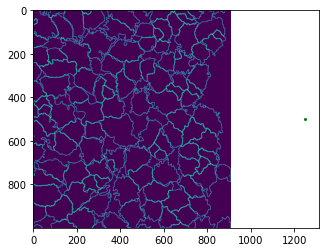

In [150]:

# def bounding_box(x, y):
#     top_left = (x -2.0, y-4.5)
#     bottom_right = (x + 2.0, y+4.5)

    
#     return top_left, bottom_right
    
# x, y = bounding_box(nuclei_X, nuclei_Y)

# print(x, y)




x = 1250

w = x * 2
y = 500
h = y * 2


crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.plot(1250, 500, "og", markersize=2) 
plt.show()

In [131]:

img = cv2.imread(tmp)
h, w = img.shape[0],img.shape[1]

img_scaled = cv2.resize(img, (w//5, h//5))

crop_img = img[y:y+h, x:x+w]

cv2.imshow("cropped", crop_img)



# plt.figure()
# plt.subplot(121)
# plt.title('Original_image')
# plt.imshow(img_1_orig)
# plt.subplot(122)
# plt.title('Resized Image')
# plt.imshow(img_1_scaled)
# plt.show()

TypeError: can only concatenate tuple (not "int") to tuple

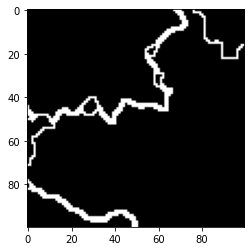

In [130]:
from PIL import Image
img = Image.open(tmp,)
area = (500, 400, 300, 500)
cropped_img = img.crop(area)

plt.imshow(cropped_img, cmap='gray')
# cropped_img.save("cropped.jpg")

In [108]:
#img = cv2.rectangle(img,(670.104176,9.209451),(674.104176,68.209451),(255,0,0),3)

import imgaug as ia
import imgaug.augmenters as iaa

ModuleNotFoundError: No module named 'imgaug'

In [74]:

# Start coordinate, here (5, 5) 
# represents the top left corner of rectangle 
start_point = (861.914, 22.5781)
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (865.914, 31.5781)
  
# Blue color in BGR 

  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
img = cv2.rectangle(img, start_point, end_point,thickness) 


# window_name = "bounding box"
# # Displaying the image  
# cv2.imshow(window_name, img)  

TypeError: function takes exactly 4 arguments (2 given)

In [22]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
target = pd.DataFrame(iris.target, columns = ['species'])

target['species']=target['species'].apply(lambda x: 'setosa' if x==0  else 'virginica' if x == 1 else 'versicolor')

df = pd.concat([data, target], axis=1)
df

sepal length  sepal width  petal length  petal width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3  versicolor
146           6.3          2.5           5.0          1.9  versicolor
147           6.5          3.0           5.2          2.0  versicolor
148           6.2          3.4           5.4          2.3  versicolor
149           5.9          3.0           5.1          1.8  versicolor

[150 rows x 5 columns]

In [23]:
import pandas as pd
from pprint import pprint as pp
from itertools import combinations
from pathlib import Path
import requests
import numpy as np
from bokeh.io import output_notebook, curdoc  # output_file
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers
from bokeh.sampledata.iris import flowers as iris_df
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider, Column, Select
from bokeh.models import CheckboxGroup, RadioGroup, Toggle, Button
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import row, column, gridplot, widgetbox
from bokeh.palettes import Spectral6
from bokeh.themes import Theme
import yaml

output_notebook()

Loading BokehJS ...

In [35]:
df

sepal length  sepal width  petal length  petal width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3  versicolor
146           6.3          2.5           5.0          1.9  versicolor
147           6.5          3.0           5.2          2.0  versicolor
148           6.2          3.4           5.4          2.3  versicolor
149           5.9          3.0           5.1          1.8  versicolor

[150 rows x 5 columns]

In [32]:
import pandas as pd
import numpy as np

from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler
from bokeh.plotting import figure
from bokeh.layouts import widgetbox, layout
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Button

In [72]:
def scatterplot(source):
    tools = ['pan', 'box_select', 'wheel_zoom', 'reset']
    hover1 = HoverTool(tooltips=[("Petal Length", df['Petal Length']), ('Sepal length', 'Sepal width')])
    tools=[hover1]
    colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
    colors = [colormap[x] for x in source['species']]
    
    scatter = figure(title='scatterplot', tools=tools)
    scatter.xaxis.axis_label = 'Petal Length'
    scatter.yaxis.axis_label = 'Petal Width'
    
    scatter.circle(source['petal length'], y=source['petal width'],color=colors, fill_alpha=0.2, size=10)

    return scatter


p = scatterplot(df)
show(p)



# def save_selected(dataframe, selection):
#     data = dataframe.iloc[selection]
#     def save():
#         print(f'I got your df right here! {data.shape}')
#         pass # ??? Provide csv to user
#     return save


# def clear_click_callbacks(button):
#     button._callbacks['clicks'].clear()
    

# scatter = scatterplot(df)
# show(scatter)
# savebutton = Button(label='download selected points')
# savebutton.on_click(save_selected(df, selection=[]))

#         def update_selection(attr, old, new):
#             clear_click_callbacks(savebutton)  # on_click appends, want replace
#             savebutton.on_click(save_selected(dataframe,
#                                               selection=new.indices))

#         source.on_change('selected', update_selection)
#         page_content = layout([[scatter], [savebutton]])
#         doc.title = 'save selected points!'
#         doc.add_root(page_content)
#     return makedoc
    
    

# def main(path='/', port=5000):
#     df = pd.DataFrame({'x': np.random.random(100),
#                        'y': np.random.random(100),
#                        'useful': np.random.randint(0, 100, size=100)})
#     apps = {path: Application(FunctionHandler(generate_makedoc_function(df)))}
#     server = Server(apps, port=port, allow_websocket_origin=['*'])
#     server.run_until_shutdown()


# if __name__ == '__main__':
#     main()



KeyError: 'Petal Length'

In [76]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


tm = scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …

TypeError: 'int' object is not iterable

TypeError: 'int' object is not iterable

TypeError: 'int' object is not iterable

TypeError: 'int' object is not iterable

In [196]:
import plotly.graph_objs as go
import plotly.offline as py

import pandas as pd
import numpy as np
from ipywidgets import interactive, HBox, VBox

py.init_notebook_mode()

df = pd.read_csv('https://raw.githubusercontent.com/jonmmease/plotly_ipywidget_notebooks/master/notebooks/data/cars/cars.csv')


f = go.FigureWidget([go.Scatter(y = df['City mpg'], x = df['City mpg'], mode = 'markers')])
scatter = f.data[0]
N = len(df)
scatter.x = scatter.x + np.random.rand(N)/10 *(df['City mpg'].max() - df['City mpg'].min())
scatter.y = scatter.y + np.random.rand(N)/10 *(df['City mpg'].max() - df['City mpg'].min())
scatter.marker.opacity = 0.5

def update_axes(xaxis, yaxis):
    scatter = f.data[0]
    scatter.x = df[xaxis]
    scatter.y = df[yaxis]
    with f.batch_update():
        f.layout.xaxis.title = xaxis
        f.layout.yaxis.title = yaxis
        scatter.x = scatter.x + np.random.rand(N)/10 *(df[xaxis].max() - df[xaxis].min())
        scatter.y = scatter.y + np.random.rand(N)/10 *(df[yaxis].max() - df[yaxis].min())

axis_dropdowns = interactive(update_axes, yaxis = df.select_dtypes('int64').columns, xaxis = df.select_dtypes('int64').columns)

# Create a table FigureWidget that updates on selection from points in the scatter plot of f
t = go.FigureWidget([go.Table(
    header=dict(values=['ID','Classification','Driveline','Hybrid'],
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=[df[col] for col in ['ID','Classification','Driveline','Hybrid']],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))])

def selection_fn(trace,points,selector):
    t.data[0].cells.values = [df.loc[points.point_inds][col] for col in ['ID','Classification','Driveline','Hybrid']]
    #return pd.DataFrame(t.data[0].cells.values)



scatter.on_selection(selection_fn)

# Put everything together
VBox((HBox(axis_dropdowns.children),f,t))

In [198]:
col = [e for e in t.data[0].header.values]
dt = [list(i) for i in zip(*t.data[0].cells.values)]
dt

[['2011 Hyundai Sonata Hybrid',
  'Automatic transmission',
  'Front-wheel drive',
  True]]

In [199]:
pd.DataFrame(dt, columns = col)

ID          Classification          Driveline  \
0  2011 Hyundai Sonata Hybrid  Automatic transmission  Front-wheel drive   

   Hybrid  
0    True

In [197]:
t

FigureWidget({
    'data': [{'cells': {'align': [left, left, left, left, left],
                        'fill'…

In [121]:
t.data[0].cells.values

(['2012 Toyota Yaris 5-Door Liftback L',
  '2012 Volkswagen Jetta SportWagen TDI',
  '2012 Honda CR-Z EX'],
 ['Automatic transmission', 'Manual transmission', 'Manual transmission'],
 ['Front-wheel drive', 'Front-wheel drive', 'Front-wheel drive'],
 [False, False, True])